In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder = ('/content/drive/MyDrive/Book_data/Ratings.csv')
ratings = pd.read_csv(folder)
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.rename(columns = {'ISBN':'isbn'}, inplace = True)

In [ ]:
folder = ('/content/drive/MyDrive/Book_data/books_new.csv')
books = pd.read_csv(folder, on_bad_lines='skip')
books.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [ ]:
books[["publication_day", "publication_month", "publication_year"]] = books["publication_date"].str.split("/", expand = True)

In [ ]:
books = books.drop("publication_day", axis = 1)
books = books.drop("publication_month", axis = 1)
books = books.drop("isbn13", axis = 1)

In [ ]:
books.head()

,bookID,title,authors,average_rating,isbn,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,eng,352,6333,244,11/1/2003,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,eng,2690,41428,164,9/13/2004,Scholastic,2004


In [ ]:
book_new = pd.merge(books, ratings, on='isbn')

In [ ]:
book_new.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
publication_year      0
User-ID               0
Book-Rating           0
dtype: int64

In [ ]:
book_new = book_new.drop("Book-Rating", axis = 1)

In [ ]:
book_new.drop_duplicates(keep='last', inplace=True)
book_new.reset_index(drop = True, inplace = True)

In [ ]:
book_new.describe()

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,User-ID
count,55403.000000,55403.000000,55403.000000,5.540300e+04,55403.000000,55403.000000
mean,18056.758154,3.902149,387.194448,7.450333e+04,2132.128910,139294.403498
std,13694.821863,0.237184,170.009719,2.164629e+05,4614.276172,80663.810194
min,2.000000,2.620000,0.000000,1.000000e+00,0.000000,9.000000
25%,5212.000000,3.760000,288.000000,2.781000e+03,157.000000,69697.000000
50%,14748.000000,3.910000,366.000000,1.362200e+04,569.000000,138341.000000
75%,30363.000000,4.060000,454.000000,5.751300e+04,1851.000000,210485.000000
max,45634.000000,4.760000,2088.000000,2.530894e+06,43499.000000,278854.000000


In [ ]:
book_new.shape

(55403, 13)

**DATA VISULIAZATION**

Text(0.5, 1.0, 'No. of Books by an author (top 15)')

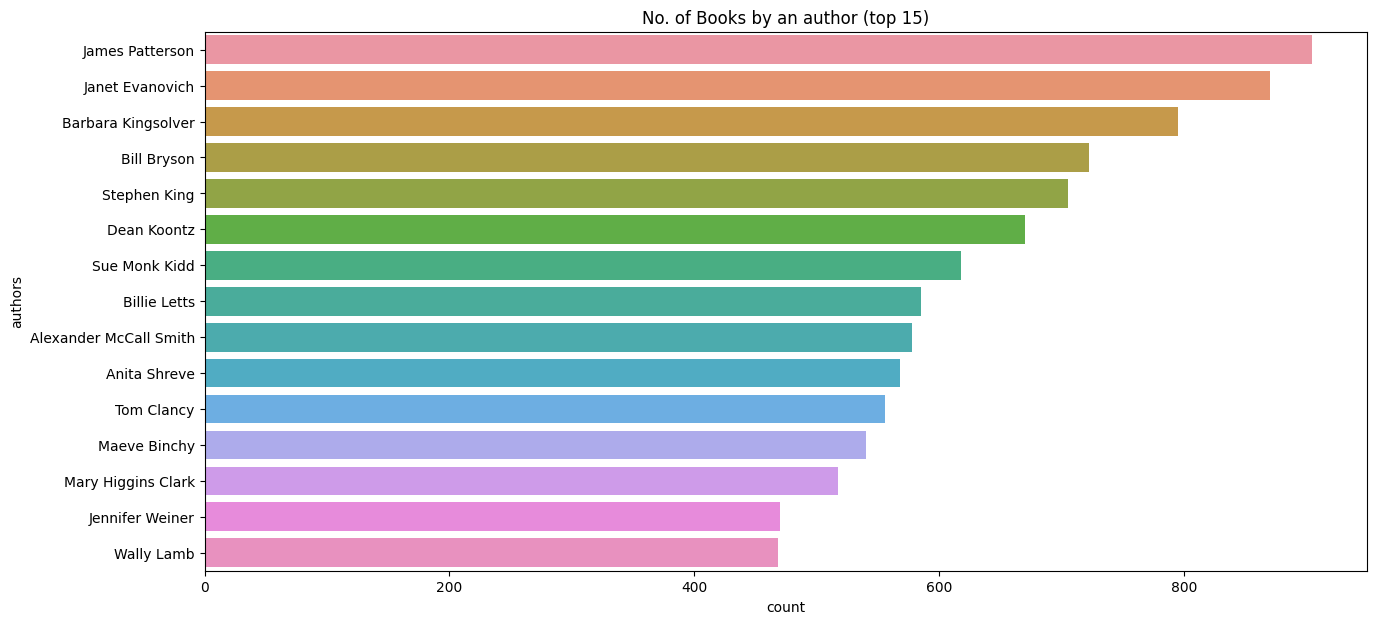

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(y = "authors", data= book_new, order=book_new['authors'].value_counts().index[0:15])
plt.title("No. of Books by an author (top 15)")

Text(0.5, 1.0, 'No. of Books by an publisher (top 15)')

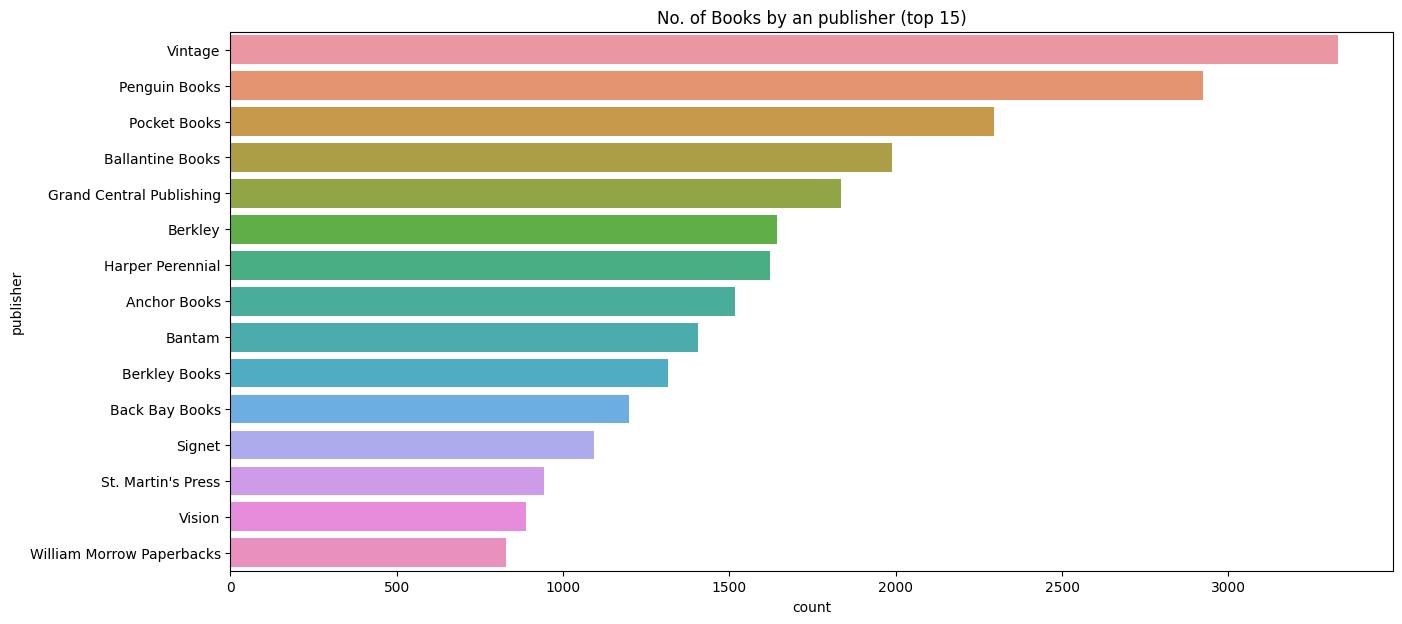

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(y = "publisher", data= book_new, order=book_new['publisher'].value_counts().index[0:15])
plt.title("No. of Books by an publisher (top 15)")

Text(0.5, 1.0, 'No. of Books by an book title (top 15)')

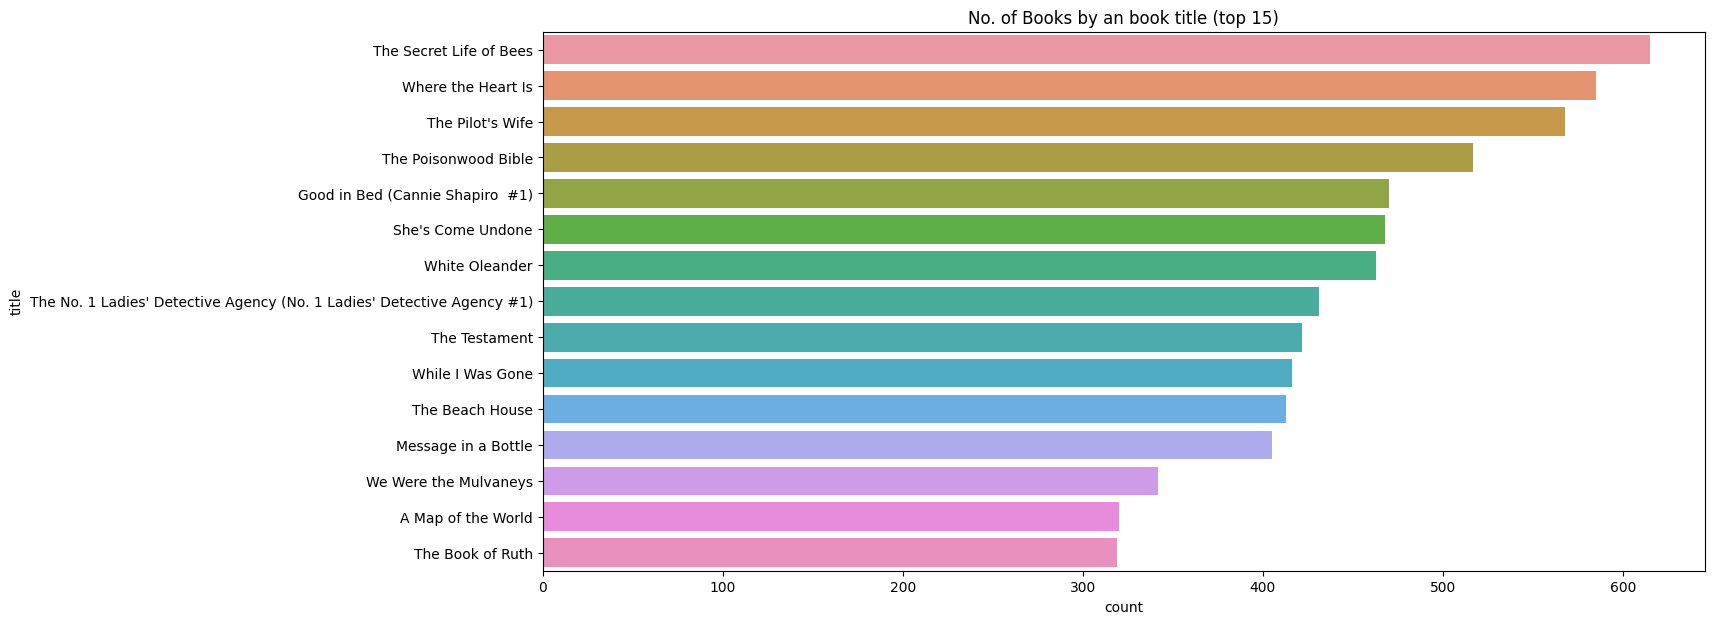

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(y = "title", data= book_new, order=book_new['title'].value_counts().index[0:15])
plt.title("No. of Books by an book title (top 15)")

Text(0.5, 1.0, 'No. of Books by an book language  (top 7)')

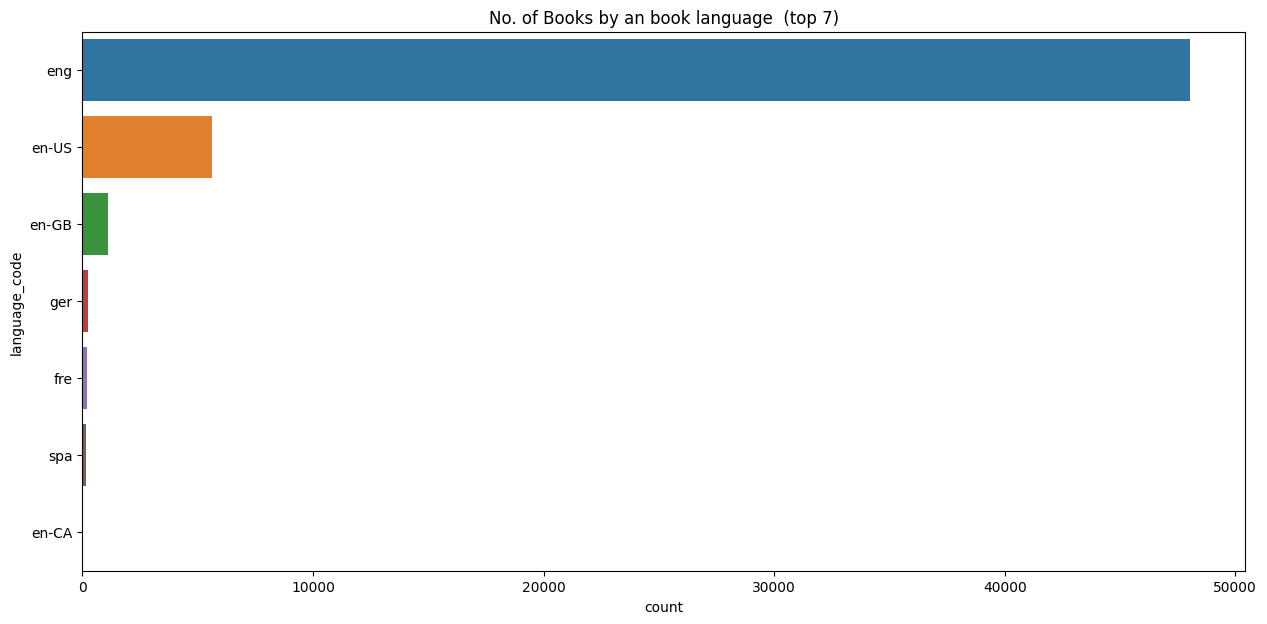

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(y = "language_code", data= book_new, order=book_new['language_code'].value_counts().index[0:7])
plt.title("No. of Books by an book language  (top 7)")

Text(0.5, 1.0, 'Explicit Ratings')

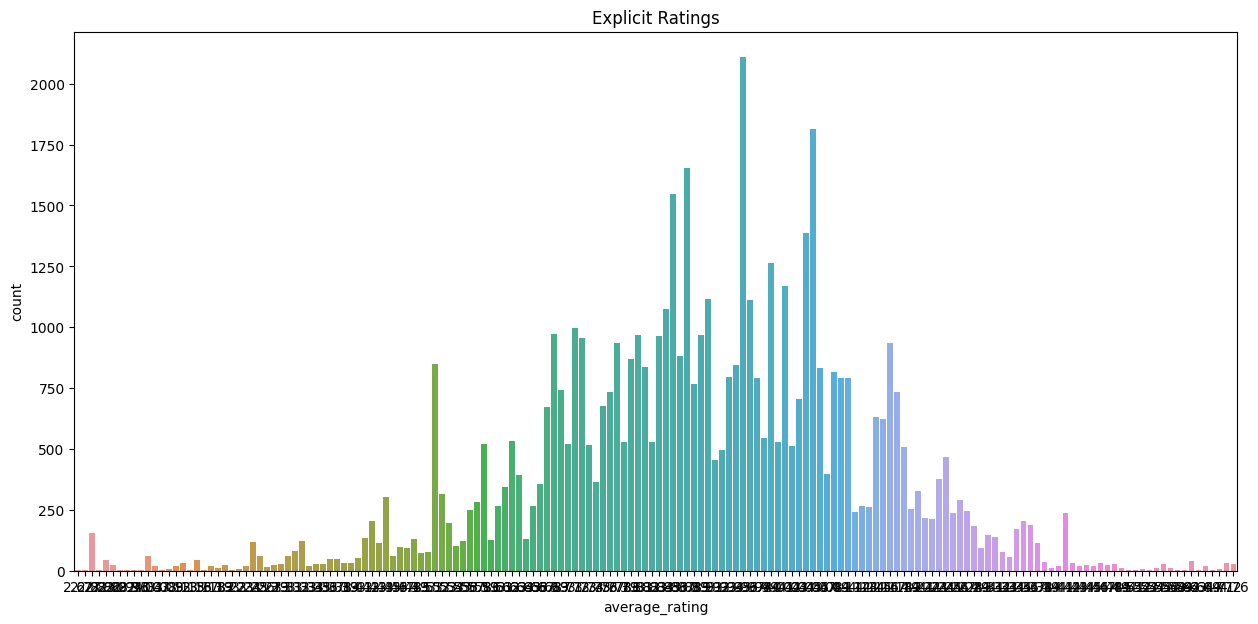

In [ ]:
plt.figure(figsize=(15,7))
dt = book_new[book_new['average_rating'] != 0]
sns.countplot(x = 'average_rating', data = dt)
plt.title("Explicit Ratings")

# **Recommendation Model**

In [ ]:
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

#Quiet Days in Clichy
#Dune Messiah (Dune Chronicles #2)
#Bryson's Dictionary of Troublesome Words: A Writer's Guide to Getting It Right

Enter a book name: Quiet Days in Clichy
Enter number of books to recommend: 5


**Books by same Author**

In [ ]:
def printBook(k, n):
    z = k['title'].unique()
    for x in range(len(z)):
        print(z[x])
        if x >= n-1:
            break

In [ ]:
def get_books1(dataframe, name, n):
    print("\nBooks by same Author:\n")
    au = dataframe['authors'].unique()

    data = book_new[book_new['title'] != name]

    if au[0] in list(data['authors'].unique()):
        k2 = data[data['authors'] == au[0]]
    k2 = k2.sort_values(by=['average_rating'])
    printBook(k2, n)

In [ ]:
if bookName in list(book_new['title'].unique()):
    d = book_new[book_new['title'] == bookName]
    get_books1(d, bookName, number)
else:
    print("Invalid Book Name!!")


Books by same Author:

Tropic of Capricorn
The Books in My Life
The Air-Conditioned Nightmare
Sexus (The Rosy Crucifixion  #1)
Nexus (The Rosy Crucifixion  #3)


**Books by same publisher**

In [ ]:
def get_books2(dataframe, name, n):
    print("\nBooks by same Publisher:\n")
    au = dataframe['publisher'].unique()

    data = book_new[book_new['title'] != name]

    if au[0] in list(data['publisher'].unique()):
        k2 = data[data['publisher'] == au[0]]
    k2 = k2.sort_values(by=['average_rating'])
    printBook(k2, n)

In [ ]:
if bookName in list(book_new['title'].unique()):
    d = book_new[book_new['title'] == bookName]
    get_books2(d, bookName, number)
else:
    print("Invalid Book Name!!")


Books by same Publisher:

Four Blondes
The Soft Machine (The Nova Trilogy #1)
Great Expectations
The Wild Boys
Nova Express (The Nova Trilogy  #3)


**Popularity based**

In [ ]:
C= book_new['average_rating'].mean()
m= book_new['ratings_count'].quantile(0.60)
Top_Books = book_new.loc[book_new['ratings_count'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=3.9021491615977477 , m=23409.0


(22268, 13)

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['ratings_count']
    R = x['average_rating']
    return (v/(v+m) * R) + (m/(m+v) * C)


Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)


#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [ ]:

Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('isbn').sort_index()
cm=sns.light_palette('yellow',as_cmap=True)

Top_Books = Top_Books.sort_values('Score', ascending=False)

Top_Books[['title', 'ratings_count', 'average_rating', 'Score']].reset_index(drop=True).head(15).style.background_gradient(cmap=cm)

,title,ratings_count,average_rating,Score
0,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),2339585,4.560000,4.553483
1,Harry Potter and the Order of the Phoenix (Harry Potter #5),2153167,4.490000,4.483678
2,The Complete Maus,111475,4.550000,4.437566
3,The Two Towers (The Lord of the Rings #2),593467,4.440000,4.419590
4,Harry Potter and the Chamber of Secrets (Harry Potter #2),2293963,4.420000,4.414769
5,The Calvin and Hobbes Tenth Anniversary Book,49122,4.630000,4.395090
6,A Clash of Kings (A Song of Ice and Fire #2),638766,4.410000,4.392047
7,The Green Mile,207869,4.440000,4.385561
8,The Fellowship of the Ring (The Lord of the Rings #1),2128944,4.360000,4.355020
9,Season of Mists (The Sandman #4),50951,4.540000,4.339201


In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

**Collaborative Filtering**

In [ ]:
df = pd.DataFrame(book_new['title'].value_counts())

df['title'] = df.index
df.reset_index(level=0, inplace=True)
df = df.drop('index',axis=1)

df = book_new.merge(df, left_on = 'title', right_on = 'title', how = 'left')

popularity_threshold = 3
popular_book = df[df['average_rating'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)

In [ ]:
testdf = pd.DataFrame()
testdf['isbn'] = popular_book['isbn']
testdf['average_rating'] = popular_book['average_rating']
testdf['User-ID'] = popular_book['User-ID']
testdf = testdf[['User-ID','average_rating']].groupby(testdf['isbn'])

In [ ]:
listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0

for groupKey in testdf.groups.keys():
    tempDict={}
    groupDF = testdf.get_group(groupKey)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1]
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict)

dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
pairwiseSimilarity = cosine_similarity(vector)

In [ ]:
def printBookDetails(ID):
    print(book_new[book_new['isbn']==ID]['title'].values[0])

def getTopRecommandations(ID):
    collaborative = []
    row = reverseIndexMap[ID]
    print("Input Book:")
    printBookDetails(ID)

    print("\nRECOMMENDATIONS:\n")

    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
          if book_new[book_new['isbn']==indexMap[i]]['title'].values[0] not in similar:
                if mn >= number:
                      break
                mn+=1
                similar.append(book_new[book_new['isbn']==indexMap[i]]['title'].values[0])
                printBookDetails(indexMap[i])
                collaborative.append(book_new[book_new['isbn']==indexMap[i]]['title'].values[0])
    return collaborative


In [ ]:
bookName1 = input("Enter a book name: ")
#Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)
#Coming Into the Country
#Philosophy of Religion
#Harry Potter and the Half-Blood Prince (Harry Potter  #6)
#The New York Trilogy

Enter a book name: Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)


In [ ]:
k = list(book_new['title'])
m = list(book_new['isbn'])

collaborative = getTopRecommandations(m[k.index(bookName1)])

Input Book:
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)

RECOMMENDATIONS:

The Death of Ivan Ilych & Other Stories
The Idiot
The Partly Cloudy Patriot
Philosophy of Religion
Cash
Laura Ingalls Wilder Country: The People and places in Laura Ingalls Wilder's life and books
Juniper


**Content Based**

In [ ]:
popularity_threshold = 3
popular_book = df[df['average_rating'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
popular_book.shape

(55164, 13)

In [ ]:
tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_book['title'])
tfidf_matrix.shape

(55164, 13658)

In [ ]:
normalized_df = tfidf_matrix.astype(np.float32)
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

(55164, 55164)

In [ ]:
print("Recommended Books:\n")
isbn = book_new.loc[book_new['title'] == bookName1].reset_index(drop = True).iloc[0]['isbn']
content = []

idx = popular_book.index[popular_book['isbn'] == isbn].tolist()[0]
similar_indices = cosine_similarities[idx].argsort()[::-1]
similar_items = []
for i in similar_indices:
    if popular_book['title'][i] != bookName1 and popular_book['title'][i] not in similar_items and len(similar_items) < number :
        similar_items.append(popular_book['title'][i])
        content.append(popular_book['title'][i])

for book in similar_items:
    print(book)

Recommended Books:

Harry Potter and the Chamber of Secrets (Harry Potter  #2)
Harry Potter and the Goblet of Fire (Harry Potter  #4)
Harry Potter and the Order of the Phoenix (Harry Potter  #5)
Harry Potter and the Sorcerer's Stone (Harry Potter  #1)
Harry Potter y la Orden del Fénix (Harry Potter  #5)
Harry Potter und der Gefangene von Askaban (Harry Potter  #3)
Ultimate Unofficial Guide to the Mysteries of Harry Potter: Analysis of Books 1-4


In [ ]:
number1 = int(input("Enter number of books to recommend: "))

Enter number of books to recommend: 7


**Hybrid Recommender**

In [ ]:
from numpy import *
import operator

In [ ]:
z = list()
num = 1/number1
k = float(num)
for x in range(number1 ):
      z.append(1-k*x)

dictISBN = {}
for x in collaborative:
      dictISBN[x] = z[collaborative.index(x)]

for x in content:
    if x not in dictISBN:
        dictISBN[x] = z[content.index(x)]
    else:
        dictISBN[x] += z[content.index(x)]

ISBN = dict(sorted(dictISBN.items(),key=operator.itemgetter(1),reverse=True))
w = 0
print("Input Book:\n")
print(bookName1)
print("\nRecommended Books:\n")
for x in ISBN.keys():
    if w >= number1:
        break
    w+=1
    print(x)

Input Book:

Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)

Recommended Books:

The Death of Ivan Ilych & Other Stories
Harry Potter and the Chamber of Secrets (Harry Potter  #2)
The Idiot
Harry Potter and the Goblet of Fire (Harry Potter  #4)
The Partly Cloudy Patriot
Harry Potter and the Order of the Phoenix (Harry Potter  #5)
Philosophy of Religion
